In [ ]:
!pip install scikit-learn matplotlib pandas seaborn numpy kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, mean_squared_error,
                             mean_absolute_error,
                             r2_score, precision_recall_curve, roc_curve, auc)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import zipfile
import os
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"siichee","key":"e05e8401e20ba76d2b260240f201968f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d threnjen/2019-airline-delays-and-cancellations

Dataset URL: https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations
License(s): U.S. Government Works
 98% 739M/754M [00:03<00:00, 256MB/s]
100% 754M/754M [00:03<00:00, 237MB/s]


In [ ]:
with zipfile.ZipFile('2019-airline-delays-and-cancellations.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

os.listdir('dataset')

['train.csv',
 'full_data_flightdelay.csv',
 'raw_data',
 'raw_data_documentation.txt',
 'train_sets_documentation.txt',
 'test.csv']

In [ ]:
data = pd.read_csv('dataset/full_data_flightdelay.csv')

In [ ]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [ ]:
data.isnull().sum()

,0
MONTH,0
DAY_OF_WEEK,0
DEP_DEL15,0
DEP_TIME_BLK,0
DISTANCE_GROUP,0
SEGMENT_NUMBER,0
CONCURRENT_FLIGHTS,0
NUMBER_OF_SEATS,0
CARRIER_NAME,0
AIRPORT_FLIGHTS_MONTH,0


In [ ]:
columns = [
    'MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
    'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME',
    'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
    'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
    'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT',
    'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND'
]
data = data[columns]

data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,0.000062,0.000099,8,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,0.000144,0.000149,3,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,0.000144,0.000149,18,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,0.000144,0.000149,2,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,0.000009,0.000125,1,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,0.000062,0.000099,8,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,0.000144,0.000149,3,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,0.000144,0.000149,18,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,0.000144,0.000149,2,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,0.000009,0.000125,1,McCarran International,NONE,0.0,0.0,0.0,65.0,2.91


In [ ]:
data.to_csv('processed_data.csv', index=False)

In [ ]:
def time_range_to_midpoint(time_range):
    start, end = time_range.split('-')
    start_hour = int(start[:2])
    end_hour = int(end[:2])
    midpoint = (start_hour + end_hour) / 2
    return midpoint

In [ ]:
data['DEP_TIME_BLK'] = data['DEP_TIME_BLK'].apply(time_range_to_midpoint)

In [ ]:
data['DEP_TIME_BLK']

,DEP_TIME_BLK
0,8.0
1,7.0
2,6.0
3,6.0
4,2.5
...,...
6489057,23.0
6489058,18.0
6489059,20.0
6489060,21.0


In [ ]:
data.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PRCP,SNOW,SNWD,TMAX,AWND
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,...,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,6.607062e+00,3.935598e+00,1.891441e-01,1.314045e+01,3.821102e+00,3.046890e+00,2.783675e+01,1.337397e+02,1.268458e+04,6.296058e+04,...,1.588639e+06,7.814970e+06,9.753707e-05,1.355612e-04,1.153211e+01,1.037063e-01,3.159310e-02,9.152397e-02,7.146846e+01,8.341329e+00
std,3.396853e+00,1.995200e+00,3.916231e-01,4.995725e+00,2.382233e+00,1.757864e+00,2.151060e+01,4.645213e+01,8.839796e+03,3.438223e+04,...,1.123847e+06,5.046882e+06,8.644459e-05,4.649970e-05,6.935706e+00,3.432134e-01,3.170163e-01,7.281285e-01,1.835333e+01,3.607604e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,2.500000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,...,7.047600e+04,4.737940e+05,0.000000e+00,7.134695e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,...,6.732210e+05,2.688839e+06,3.419267e-05,9.889412e-05,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,1.300000e+01,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,...,1.486066e+06,8.501631e+06,6.178236e-05,1.246511e-04,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,1.700000e+01,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,...,2.006675e+06,1.246018e+07,1.441659e-04,1.772872e-04,1.700000e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,2.300000e+01,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,...,4.365661e+06,1.338300e+07,3.484077e-04,2.289855e-04,3.200000e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


In [ ]:
df = data[data['MONTH'].between(1, 12)]

df = data[data['DAY_OF_WEEK'].between(1, 7)]

In [ ]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 28473
Number of duplicate rows after removal: 0


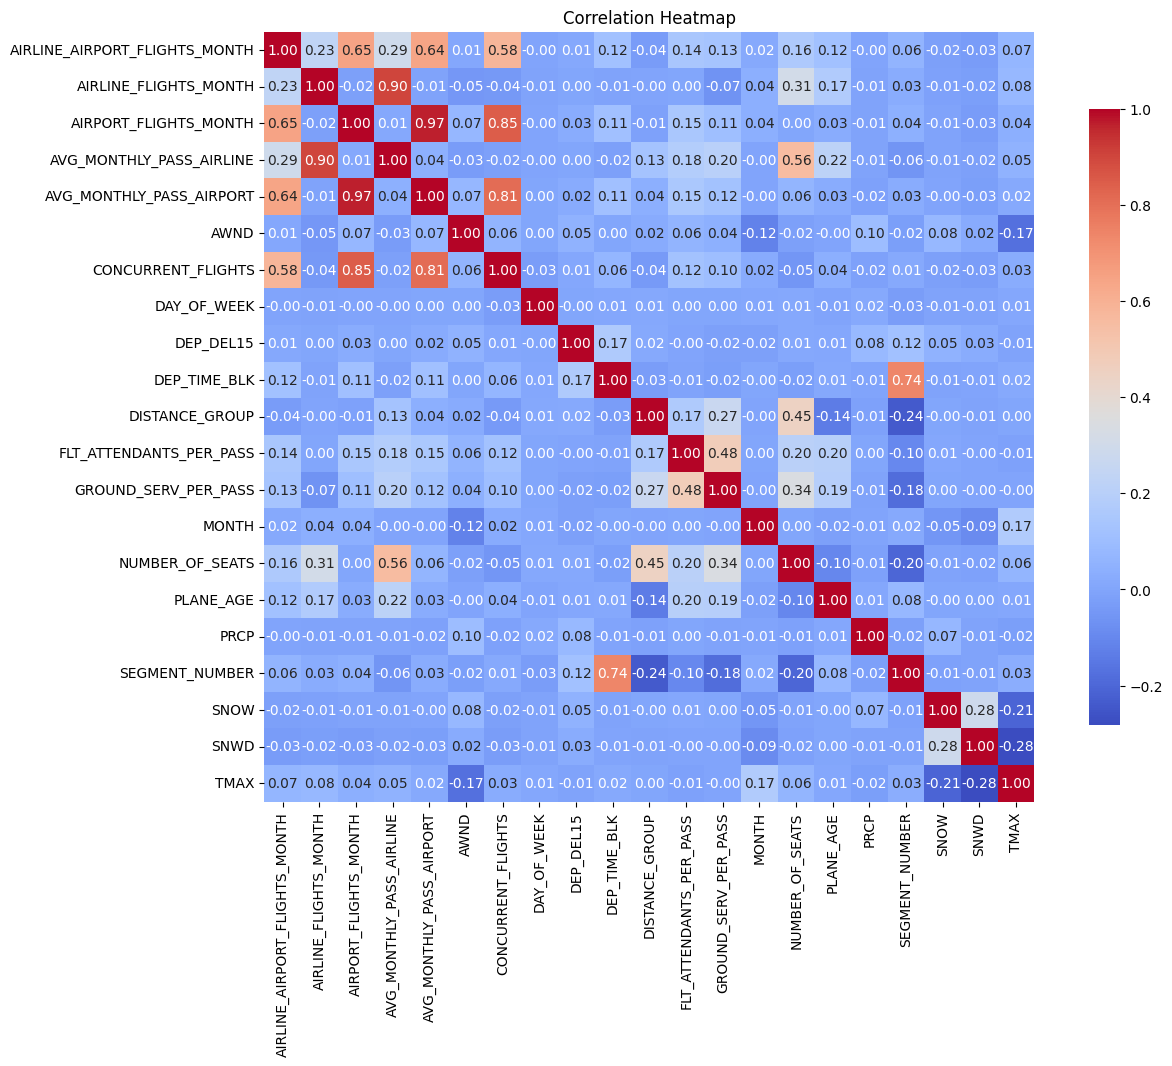

In [ ]:
excluded_cols = ['CARRIER_NAME_missing', 'DEPARTING_AIRPORT_missing', 'PREVIOUS_AIRPORT_missing']
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_cols)

# Calculate the correlation matrix with only numeric columns
correlation_matrix = df[numeric_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Heatmap')
plt.show()

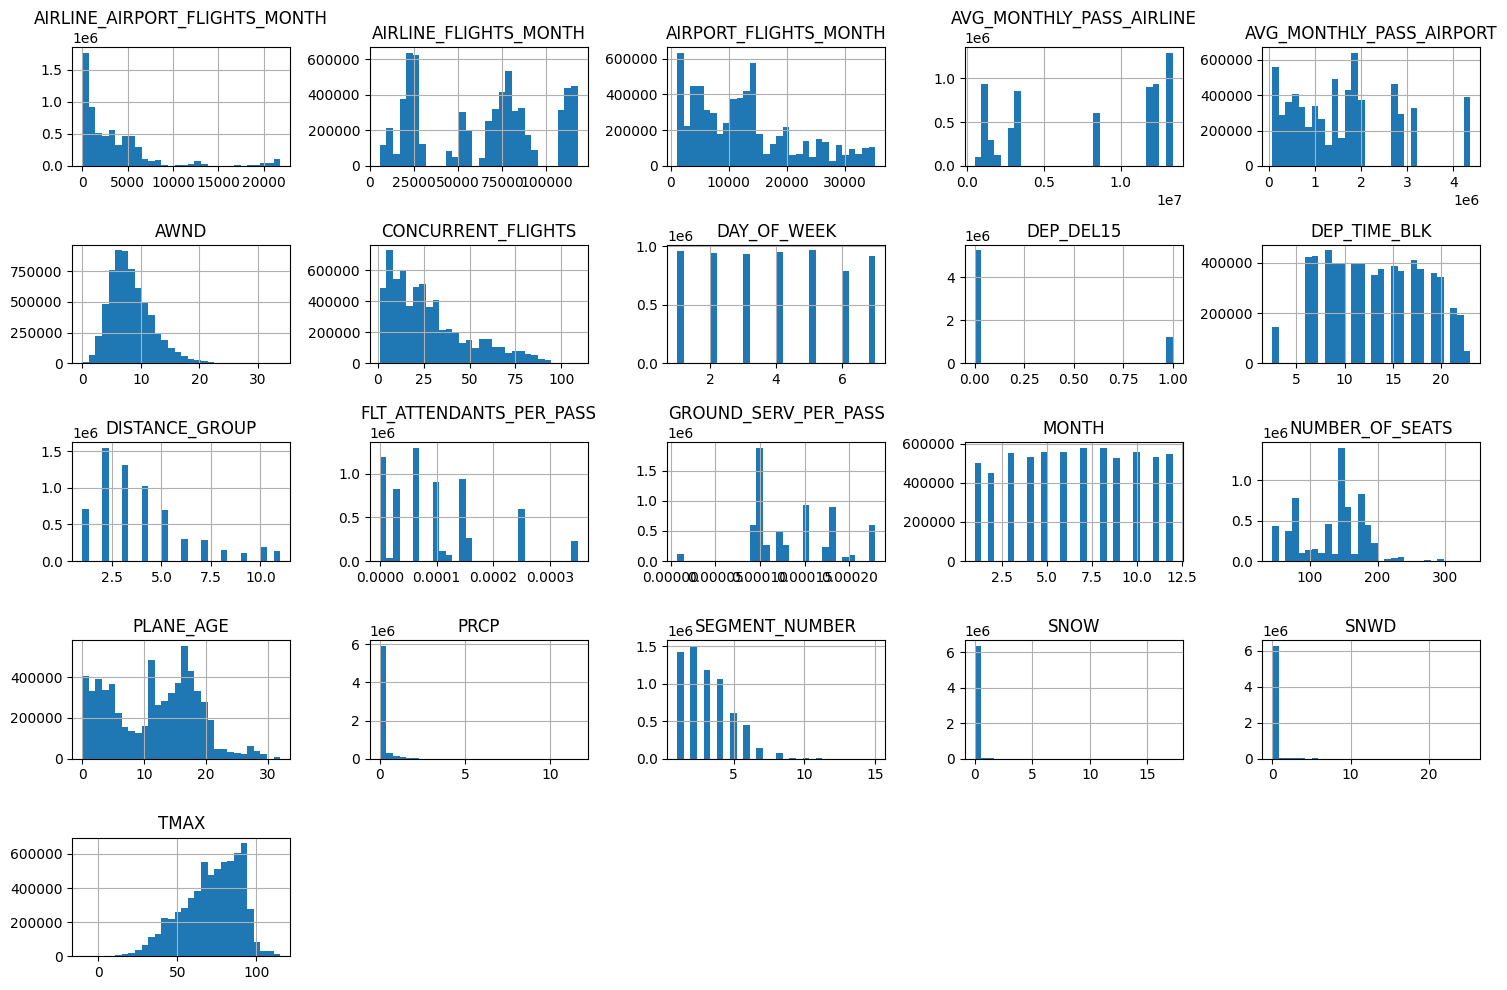

In [ ]:
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))

# Identify outliers (Z-score > 3)
outliers = np.where(z_scores > 3)

# Display outliers
print("Outliers detected at positions:", outliers)

Outliers detected at positions: (array([     17,      17,      18, ..., 6489059, 6489060, 6489061]), array([4, 7, 4, ..., 5, 5, 5]))


In [ ]:
# Remove outliers
data_cleaned = data[(z_scores < 3).all(axis=1)]

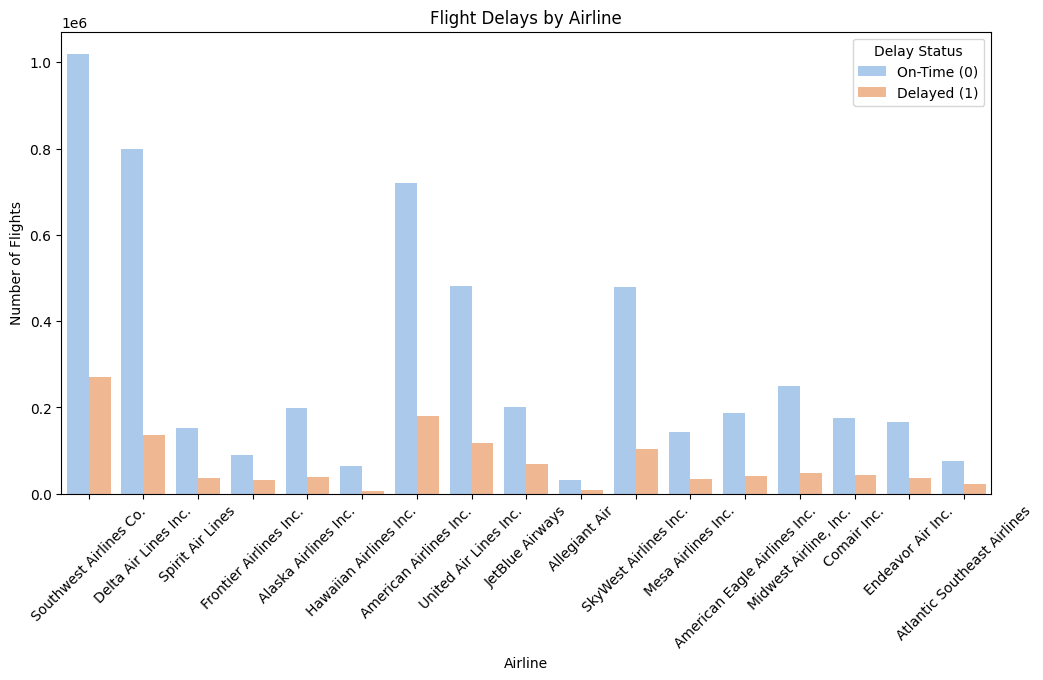

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CARRIER_NAME', hue='DEP_DEL15', data=df, palette='pastel')
plt.title('Flight Delays by Airline')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.legend(title='Delay Status', labels=['On-Time (0)', 'Delayed (1)'])
plt.show()

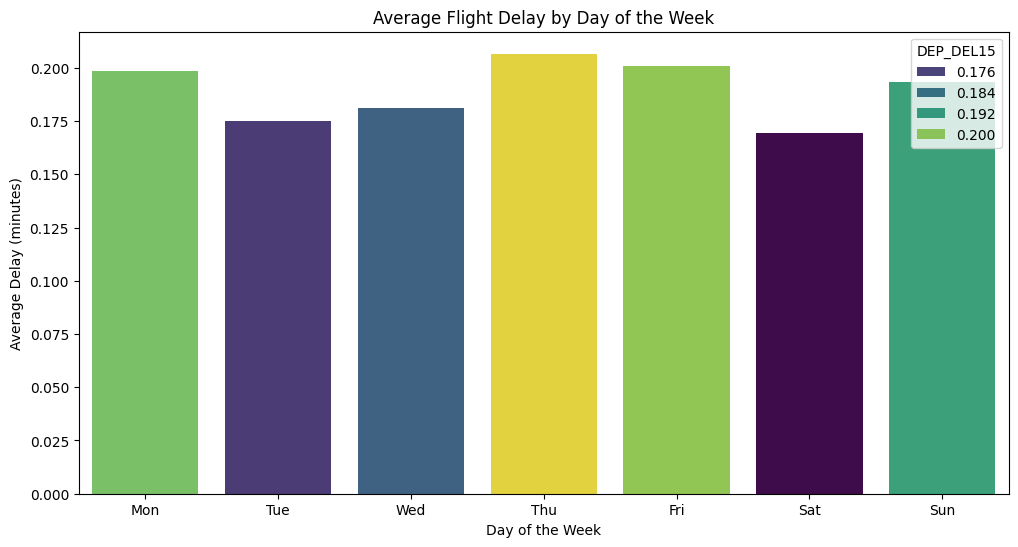

In [ ]:
avg_delay_by_day = df.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='DAY_OF_WEEK', y='DEP_DEL15', data=avg_delay_by_day, palette='viridis', hue='DEP_DEL15')
plt.title('Average Flight Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

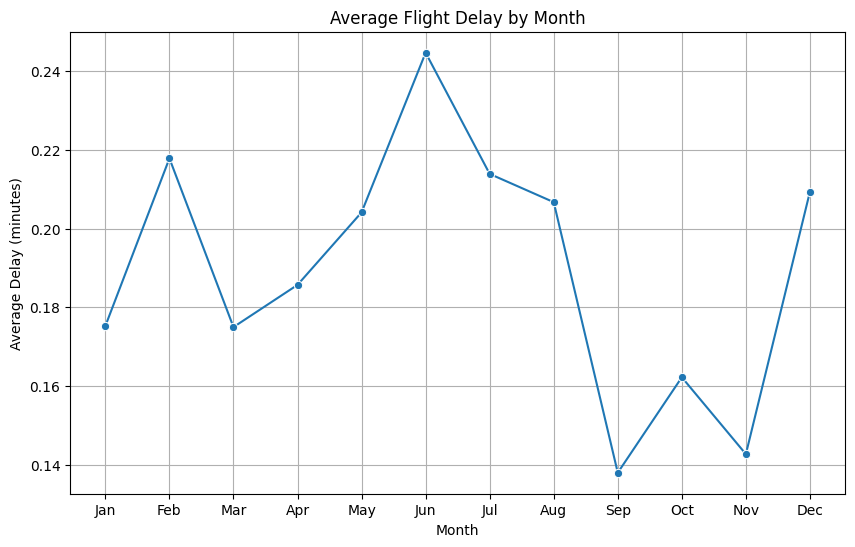

In [ ]:
avg_delay_by_month = df.groupby('MONTH')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='DEP_DEL15', data=avg_delay_by_month, marker='o')
plt.title('Average Flight Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

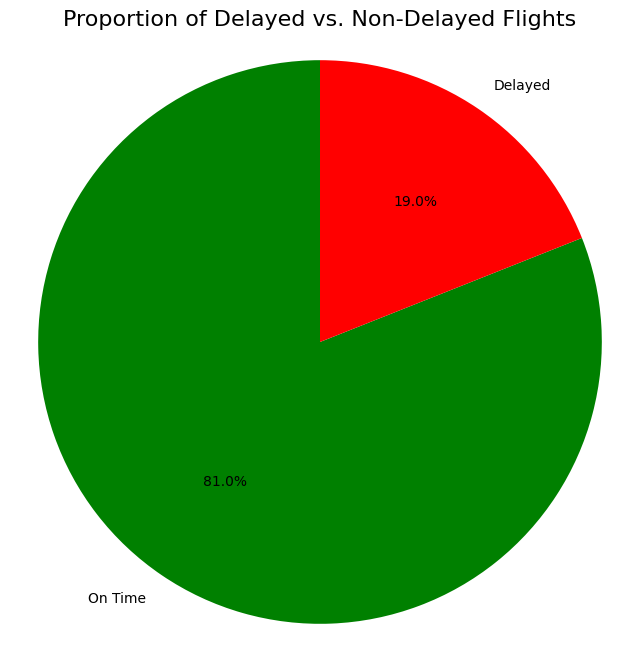

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df['DEP_DEL15'].value_counts(), labels=['On Time', 'Delayed'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

plt.title('Proportion of Delayed vs. Non-Delayed Flights', fontsize=16)
plt.axis('equal')

plt.show()

In [ ]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT'])

print(data.head())

   MONTH  DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  \
0      1            7          0               2               1   
1      1            7          0               7               1   
2      1            7          0               7               1   
3      1            7          0               9               1   
4      1            7          0               7               1   

   CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
0                  25              143                  13056   
1                  29              191                  13056   
2                  27              199                  13056   
3                  27              180                  13056   
4                  10              182                  13056   

   AIRLINE_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  \
0                 107363                           5873  ...   
1                  73508                           1174  ...   
2       

In [ ]:
X = data.drop('DEP_DEL15', axis=1)
y = data['DEP_DEL15']

In [ ]:
sample_num = 250000

In [ ]:
sampled_data = X.sample(n=sample_num, random_state=42)
sampled_target = y.loc[sampled_data.index]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sampled_data, sampled_target, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4000, 1000, 4000, 1000)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

rf_model.fit(X_train, y_train)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)

gb_predictions = gb_model.predict(X_test)

In [ ]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
Accuracy: 0.798
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.75      0.01      0.03       204

    accuracy                           0.80      1000
   macro avg       0.77      0.51      0.46      1000
weighted avg       0.79      0.80      0.71      1000



In [ ]:
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Classification Report:\n")
print(classification_report(y_test, gb_predictions))

Gradient Boosting Classifier:
Accuracy: 0.79
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       796
           1       0.12      0.00      0.01       204

    accuracy                           0.79      1000
   macro avg       0.46      0.50      0.45      1000
weighted avg       0.66      0.79      0.70      1000



In [ ]:
mse = mean_squared_error(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
r2 = r2_score(y_test, rf_predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.2020
Mean Absolute Error (MAE): 0.2020
Root Mean Squared Error (RMSE): 0.4494
R² Score: -0.2440


In [ ]:
mse = mean_squared_error(y_test, gb_predictions)
mae = mean_absolute_error(y_test, gb_predictions)
rmse = mean_squared_error(y_test, gb_predictions, squared=False)
r2 = r2_score(y_test, gb_predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.2100
Mean Absolute Error (MAE): 0.2100
Root Mean Squared Error (RMSE): 0.4583
R² Score: -0.2932


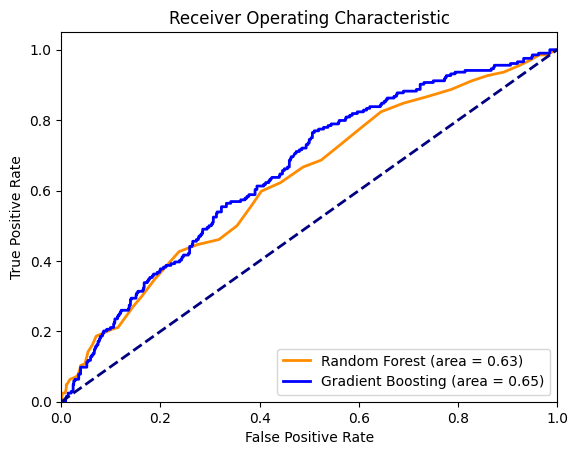

In [ ]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
gb_roc_auc = auc(gb_fpr, gb_tpr)

# Plot ROC curve
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(gb_fpr, gb_tpr, color='blue', lw=2, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

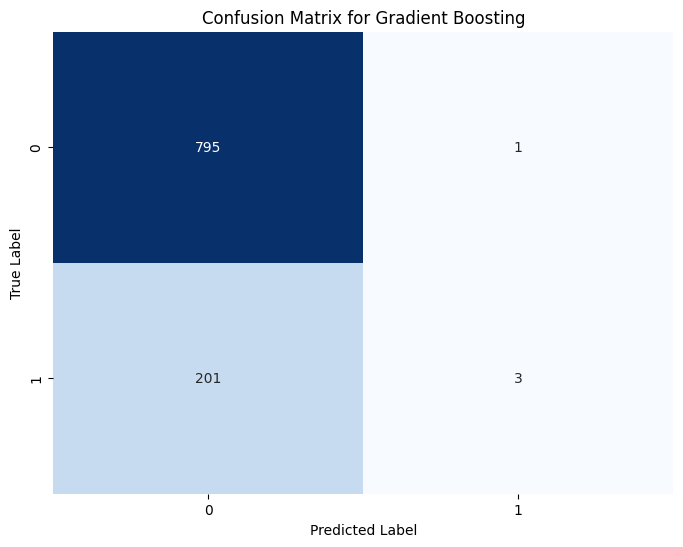

In [ ]:
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

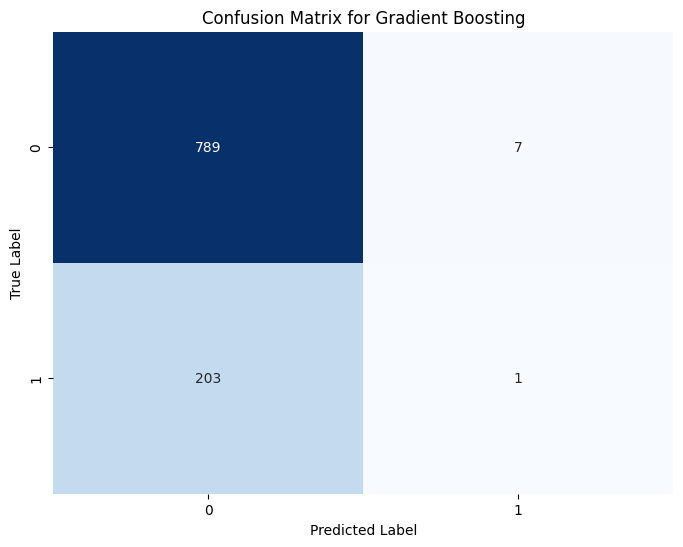

In [ ]:
conf_matrix = confusion_matrix(y_test, gb_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

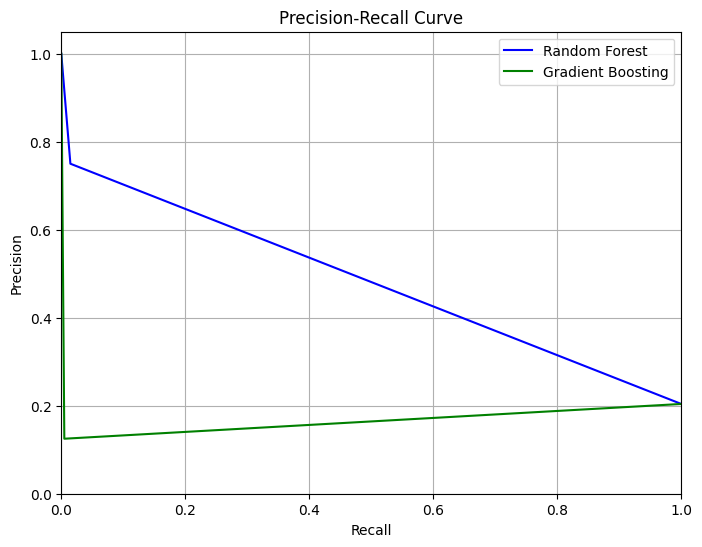

In [ ]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_predictions)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', label='Random Forest')
plt.plot(recall_gb, precision_gb, color='green', label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

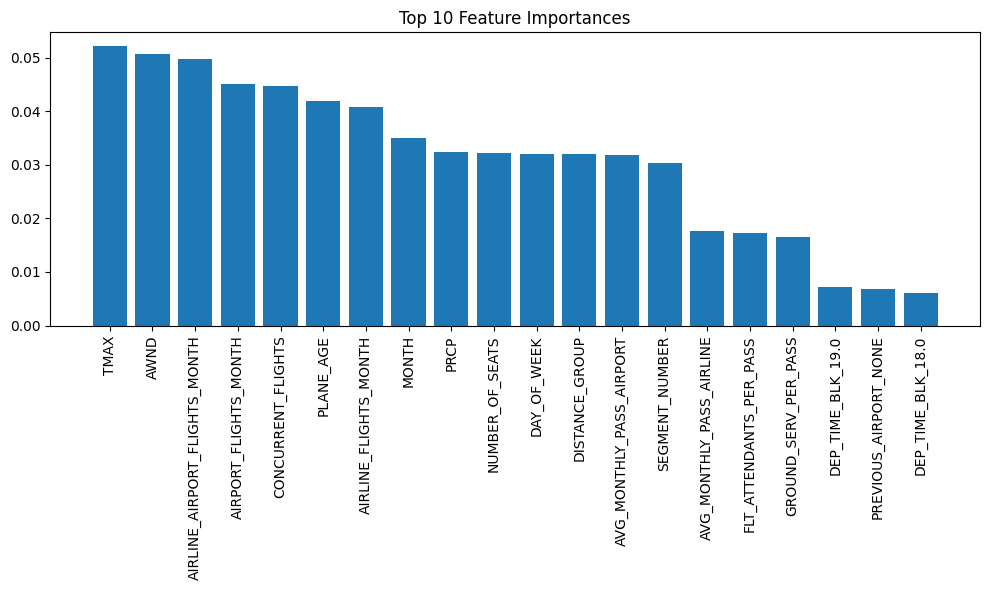

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Select the top 10 features
top_n = 20
top_indices = indices[:top_n]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(top_n), importances[top_indices], align="center")
plt.xticks(range(top_n), X.columns[top_indices], rotation=90)
plt.tight_layout()
plt.show()